# Imports

In [1]:
from scipy.misc import imread
from sklearn.linear_model import LogisticRegression

import sklearn
import time

import numpy as np
#import matplotlib.pyplot as plt
import os
import pickle
import itertools

#%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib
matplotlib.use("Pdf")
from matplotlib import pyplot as plt
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

In [124]:
%%time

with open('data_basic.pkl', 'rb') as f:
    _, _, y_train, _, _, y_val, _, _, y_test = pickle.load(f)

CPU times: user 16.2 s, sys: 4.31 s, total: 20.5 s
Wall time: 20.5 s


In [137]:
%%time

with open('data_rem_road.pkl', 'rb') as f:
    _, _, y_train, _, _, y_val, _, _, y_test = pickle.load(f)

CPU times: user 22.1 s, sys: 5.64 s, total: 27.7 s
Wall time: 27.7 s


In [8]:
%%time

with open('data_huge.pkl', 'rb') as f:
    _, _, y_train, _, _, y_val, _, _, y_test = pickle.load(f)

In [158]:
%%time

with open('data_huge_rem_road.pkl', 'rb') as f:
    _, _, y_train, _, _, y_val, _, _, y_test = pickle.load(f)

CPU times: user 1min 51s, sys: 34.2 s, total: 2min 25s
Wall time: 2min 26s


In [159]:
len(f1_train), f1_train[0].shape

(2975, (18432,))

Without road

In [3]:
%%time

with open('features_rem_road.pkl', 'rb') as f:
    f1_train, f1_val, f1_test, f2_train, f2_val, f2_test = pickle.load(f)

CPU times: user 12.1 s, sys: 1.19 s, total: 13.3 s
Wall time: 13.3 s


In [160]:
%%time

with open('features_huge_rem_road.pkl', 'rb') as f:
    f1_train, f1_val, f1_test, f2_train, f2_val, f2_test = pickle.load(f)

CPU times: user 10min 50s, sys: 6.05 s, total: 10min 56s
Wall time: 10min 56s


With road

In [11]:
with open('features_basic.pkl', 'rb') as f:
    f1_train, f1_val, f1_test, f2_train, f2_val, f2_test = pickle.load(f)

In [ ]:
%%time

with open('features_huge.pkl', 'rb') as f:
    f1_train, f2_train = pickle.load(f)

(array([  16.,   49.,   88.,  163.,  109.,  125.,  120.,  113.,  127.,
         106.,  132.,  134.,  115.,  195.,  295.,  368.,  252.,  131.,
         125.,  212.]),
 array([  14. ,   19.6,   25.2,   30.8,   36.4,   42. ,   47.6,   53.2,
          58.8,   64.4,   70. ,   75.6,   81.2,   86.8,   92.4,   98. ,
         103.6,  109.2,  114.8,  120.4,  126. ]),
 <a list of 20 Patch objects>)

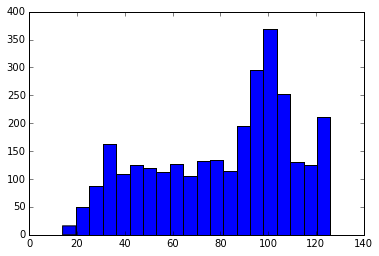

In [5]:
plt.hist(y_train, bins=20)

In [6]:
len(y_train), y_train

(2975, array([86, 93, 43, ..., 39, 97, 95], dtype=uint8))

In [129]:
bins = [np.percentile(y_train, 0),
        np.percentile(y_train, 25),
        np.percentile(y_train, 50),
        np.percentile(y_train, 75),
        np.percentile(y_train, 100) + 1]

In [130]:
bins

[14.0, 57.0, 89.0, 103.0, 127.0]

In [131]:
binary_bins = [np.percentile(y_train, 0),
               np.percentile(y_train, 50),
               np.percentile(y_train, 100) + 1]

In [132]:
binary_bins

[14.0, 89.0, 127.0]

In [138]:
y_train_binary = np.digitize(y_train, binary_bins) - 1
y_val_binary = np.digitize(y_val, binary_bins) - 1
y_test_binary = np.digitize(y_test, binary_bins) - 1

In [139]:
y_train = np.digitize(y_train, bins) - 1
y_val = np.digitize(y_val, bins) - 1
y_test = np.digitize(y_test, bins) - 1

(array([ 739.,    0.,    0.,  715.,    0.,    0.,  721.,    0.,    0.,  800.]),
 array([ 0. ,  0.3,  0.6,  0.9,  1.2,  1.5,  1.8,  2.1,  2.4,  2.7,  3. ]),
 <a list of 10 Patch objects>)

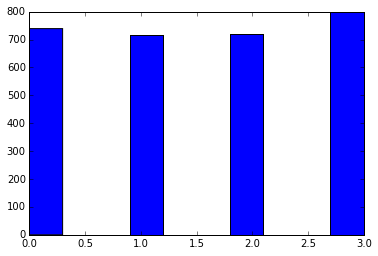

In [140]:
plt.hist(y_train)

(array([ 1454.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  1521.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

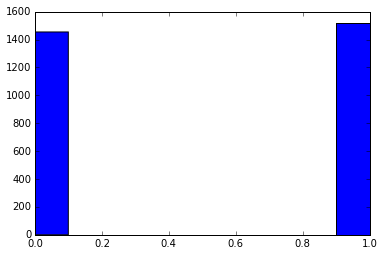

In [141]:
plt.hist(y_train_binary)

# Binary classification

In [142]:
clf = LogisticRegression(C=0.01, penalty='l1')
clf.fit(f1_train, y_train_binary).score(f1_val, y_val_binary)

0.878

# Without the road

In [28]:
clf = LogisticRegression(C=0.01, penalty='l1')
clf.fit(f1_train, y_train).score(f1_val, y_val)

0.68000000000000005

In [14]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer().fit(f1_train)
f1_train_normalized = normalizer.transform(f1_train)
f1_val_normalized = normalizer.transform(f1_val)

In [66]:
from sklearn.svm import LinearSVC

clf = LinearSVC(C=1, penalty='l2', loss='squared_hinge', dual=True, multi_class='crammer_singer')
clf.fit(f1_train_normalized, y_train).score(f1_val_normalized, y_val)

0.67000000000000004

In [55]:
clf = LogisticRegression(C=8, penalty='l1')
clf.fit(f1_train_normalized, y_train).score(f1_val_normalized, y_val)

0.67000000000000004

In [60]:
from sklearn.svm import SVC

clf = SVC(C=1, kernel='rbf', gamma=1)
clf.fit(f1_train_normalized, y_train).score(f1_val_normalized, y_val)

0.66800000000000004

In [61]:
from sklearn.svm import SVC

clf = SVC(C=1, kernel='poly', gamma=1, degree=2)
clf.fit(f1_train_normalized, y_train).score(f1_val_normalized, y_val)

0.67400000000000004

In [46]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1000).fit(f1_train_normalized)

f1_train_pca = pca.transform(f1_train_normalized)
f1_val_pca = pca.transform(f1_val_normalized)

In [45]:
from sklearn.ensemble import GradientBoostingClassifier

GradientBoostingClassifier(n_estimators=200).fit(f1_train_pca, y_train).score(f1_val_pca, y_val)

0.59799999999999998

In [76]:
from stacking import Stacking

basic_wildfowl = Stacking(base_estimators=[
        (LogisticRegression(C=0.01, penalty='l1').fit,
         lambda clf, X: clf.predict(X)),
        (lambda X, y: LinearSVC(C=1, penalty='l2', loss='squared_hinge',
                                dual=True, multi_class='crammer_singer').fit(normalizer.transform(X), y),
         lambda clf, X: clf.predict(normalizer.transform(X))),
        (lambda X, y: LogisticRegression(C=8, penalty='l1').fit(normalizer.transform(X), y),
         lambda clf, X: clf.predict(normalizer.transform(X))),
        (lambda X, y: SVC(C=1, kernel='rbf', gamma=1).fit(normalizer.transform(X), y),
         lambda clf, X: clf.predict(normalizer.transform(X))),
        (lambda X, y: SVC(C=1, kernel='poly', gamma=1, degree=2).fit(normalizer.transform(X), y),
         lambda clf, X: clf.predict(normalizer.transform(X)))],
                    n_folds=5, extend_meta=False)
basic_wildfowl.fit(np.array(f1_train), y_train)

/usr/lib64/python2.7/site-packages/sklearn/cross_validation.py:69: DeprecationWarning: The indices parameter is deprecated and will be removed (assumed True) in 0.17
  stacklevel=1)


Stacking(base_estimators=[(<bound method LogisticRegression.fit of LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)>, <f...on <lambda> at 0x1d848848>), (<function <lambda> at 0x1d848758>, <function <lambda> at 0x1d8488c0>)],
     extend_meta=False, meta_fitter=None, n_folds=5)

In [77]:
basic_wildfowl.fit_meta(SVC(C=5, kernel='poly', degree=2, gamma=1.).fit).score(np.array(f1_val), y_val)

0.68999999999999995

In [80]:
basic_wildfowl.fit_meta(SVC(C=1, kernel='poly', degree=2, gamma=1.).fit).score(np.array(f1_val), y_val)

0.68999999999999995

In [81]:
basic_wildfowl.fit_meta(SVC(C=10, kernel='poly', degree=2, gamma=1.).fit).score(np.array(f1_val), y_val)

0.68999999999999995

In [82]:
basic_wildfowl.fit_meta(SVC(C=1, kernel='rbf', gamma=1.).fit).score(np.array(f1_val), y_val)

0.69799999999999995

In [100]:
basic_wildfowl.fit_meta(SVC(C=1, kernel='rbf', gamma=0.5).fit).score(np.array(f1_val), y_val)

0.70399999999999996

In [109]:
basic_wildfowl.fit_meta(SVC(C=1, kernel='rbf', gamma=0.3).fit).score(np.array(f1_val), y_val)

0.70199999999999996

In [143]:
basic_wildfowl.fit_meta(SVC(C=1, kernel='rbf', gamma=0.2).fit).score(np.array(f1_val), y_val)

0.70599999999999996

In [105]:
basic_wildfowl.fit_meta(SVC(C=1, kernel='rbf', gamma=0.1).fit).score(np.array(f1_val), y_val)

0.70399999999999996

In [83]:
basic_wildfowl.fit_meta(SVC(C=5, kernel='rbf', gamma=1.).fit).score(np.array(f1_val), y_val)

0.69599999999999995

In [84]:
basic_wildfowl.fit_meta(SVC(C=0.5, kernel='rbf', gamma=1.).fit).score(np.array(f1_val), y_val)

0.69399999999999995

In [85]:
basic_wildfowl.fit_meta(LogisticRegression(C=1, penalty='l1').fit).score(np.array(f1_val), y_val)

0.67000000000000004

In [89]:
basic_wildfowl.fit_meta(LogisticRegression(C=10, penalty='l2').fit).score(np.array(f1_val), y_val)

0.67000000000000004

In [92]:
basic_wildfowl.fit_meta(RandomForestClassifier(n_estimators=100).fit).score(np.array(f1_val), y_val)

0.69599999999999995

In [94]:
basic_wildfowl.fit_meta(RandomForestClassifier(n_estimators=50, max_depth=10).fit).score(np.array(f1_val), y_val)

0.68999999999999995

In [95]:
basic_wildfowl.fit_meta(RandomForestClassifier(n_estimators=50, max_depth=20).fit).score(np.array(f1_val), y_val)

0.69599999999999995

In [78]:
basic_wildfowl.fit_meta(GradientBoostingClassifier(n_estimators=200).fit).score(np.array(f1_val), y_val)

0.69399999999999995

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [101]:
basic_wildfowl.fit_meta(AdaBoostClassifier(n_estimators=30).fit).score(np.array(f1_val), y_val)

0.67000000000000004

In [96]:
basic_wildfowl.fit_meta(AdaBoostClassifier(n_estimators=50).fit).score(np.array(f1_val), y_val)

0.68799999999999994

In [97]:
basic_wildfowl.fit_meta(AdaBoostClassifier(n_estimators=100).fit).score(np.array(f1_val), y_val)

0.68000000000000005

In [79]:
basic_wildfowl.score(np.array(f1_train), y_train)

0.88369747899159667

In [144]:
from stacking import Stacking

binary_wildfowl = Stacking(base_estimators=[
        (LogisticRegression(C=0.01, penalty='l1').fit,
         lambda clf, X: clf.predict(X)),
        (lambda X, y: LinearSVC(C=1, penalty='l2', loss='squared_hinge',
                                dual=True, multi_class='crammer_singer').fit(normalizer.transform(X), y),
         lambda clf, X: clf.predict(normalizer.transform(X))),
        (lambda X, y: LogisticRegression(C=8, penalty='l1').fit(normalizer.transform(X), y),
         lambda clf, X: clf.predict(normalizer.transform(X))),
        (lambda X, y: SVC(C=1, kernel='rbf', gamma=1).fit(normalizer.transform(X), y),
         lambda clf, X: clf.predict(normalizer.transform(X))),
        (lambda X, y: SVC(C=1, kernel='poly', gamma=1, degree=2).fit(normalizer.transform(X), y),
         lambda clf, X: clf.predict(normalizer.transform(X)))],
                    n_folds=5, extend_meta=False)
binary_wildfowl.fit(np.array(f1_train), y_train_binary)

/usr/lib64/python2.7/site-packages/sklearn/cross_validation.py:69: DeprecationWarning: The indices parameter is deprecated and will be removed (assumed True) in 0.17
  stacklevel=1)


Stacking(base_estimators=[(<bound method LogisticRegression.fit of LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)>, <f...on <lambda> at 0x3a2548c0>), (<function <lambda> at 0x2ae631b8>, <function <lambda> at 0x2ae635f0>)],
     extend_meta=False, meta_fitter=None, n_folds=5)

In [157]:
binary_wildfowl.fit_meta(LogisticRegression().fit).score(np.array(f1_val), y_val_binary)

0.88400000000000001

# With the road

In [32]:
clf = LogisticRegression(C=0.01, penalty='l1')
clf.fit(f1_train, y_train).score(f1_val, y_val)

0.68000000000000005

In [38]:
clf = LogisticRegression(C=0.1, penalty='l1')
clf.fit(np.hstack((f1_train, f2_train)), y_train).score(np.hstack((f1_val, f2_val)), y_val)

0.67800000000000005

### Boosting

In [40]:
f1_train[0].shape

(18432,)

In [54]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer().fit(f1_train)
f1_train_normalized = normalizer.transform(f1_train)
f1_val_normalized = normalizer.transform(f1_val)

In [56]:
from sklearn.decomposition import PCA

pca = PCA(n_components=300).fit(f1_train_normalized)

In [57]:
f1_train_pca = pca.transform(f1_train_normalized)
f1_val_pca = pca.transform(f1_val_normalized)

In [64]:
from sklearn.ensemble import GradientBoostingClassifier

GradientBoostingClassifier(n_estimators=200).fit(f1_train_pca, y_train).score(f1_val_pca, y_val)

0.59799999999999998

# With the road + segmentation

In [65]:
clf = LogisticRegression(C=0.005, penalty='l1')
clf.fit(np.hstack((np.array(f1_train), np.array(f2_train))), y_train).score(np.hstack((np.array(f1_val), np.array(f2_val))), y_val)

0.67600000000000005

# Road deleted

In [65]:
clf = LogisticRegression(C=0.01, penalty='l1')
clf.fit(np.array(f1_train), y_train).score(np.array(f1_val), y_val)

0.68000000000000005

In [67]:
y_pred = clf.predict(np.array(f1_val))

In [69]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_val, y_pred)

array([[137,  10,   0,   2],
       [ 29,  78,  15,   6],
       [  8,  13,  40,  32],
       [  9,   9,  27,  85]])

In [72]:
y_pred

array([2, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 2, 0, 0, 2, 0, 0, 0, 0, 3, 3, 0, 3,
       2, 3, 0, 3, 0, 2, 2, 3, 1, 1, 3, 2, 0, 0, 3, 3, 2, 0, 0, 0, 1, 1, 0,
       3, 0, 0, 1, 1, 0, 1, 3, 0, 0, 0, 0, 0, 3, 0, 2, 3, 3, 1, 0, 3, 0, 0,
       0, 0, 0, 0, 0, 3, 0, 1, 1, 3, 3, 3, 1, 1, 3, 2, 3, 3, 0, 3, 1, 3, 3,
       3, 0, 0, 3, 2, 3, 2, 1, 3, 1, 3, 2, 0, 0, 0, 3, 3, 0, 2, 0, 3, 3, 0,
       1, 1, 1, 3, 0, 3, 0, 0, 0, 3, 3, 3, 0, 3, 0, 0, 1, 0, 0, 0, 1, 1, 3,
       3, 0, 3, 0, 0, 1, 3, 0, 3, 0, 3, 3, 0, 3, 3, 1, 3, 0, 0, 3, 3, 0, 0,
       0, 0, 3, 0, 1, 1, 1, 0, 3, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0,
       0, 2, 0, 1, 0, 0, 0, 3, 1, 3, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 3, 1,
       1, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 2, 3, 0, 1, 1, 1, 1, 0, 1, 3, 0,
       0, 0, 3, 1, 0, 0, 1, 0, 3, 3, 3, 0, 3, 3, 0, 3, 3, 0, 0, 1, 0, 0, 3,
       1, 0, 1, 2, 2, 1, 3, 1, 3, 3, 3, 0, 0, 2, 1, 2, 1, 0, 0, 0, 0, 2, 1,
       1, 1, 2, 2, 2, 2, 0, 0, 2, 3, 3, 2, 2, 3, 2, 0, 1, 1, 1, 1, 1, 1, 0,
       2, 0,

#### Random Projections

In [16]:
n = np.array(f1_train).shape[1]
k = n / 3
P = np.random.randn(n, k) / np.sqrt(k)

f1_train_p = np.array(f1_train).dot(P)
f1_val_p = np.array(f1_val).dot(P)

In [21]:
clf = LogisticRegression(C=0.01, penalty='l1')
clf.fit(f1_train_p, y_train).score(f1_val_p, y_val)

0.66000000000000003

In [26]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer().fit(f1_train)
f1_train_normalized = normalizer.transform(f1_train)
f1_val_normalized = normalizer.transform(f1_val)

In [62]:
clf = LogisticRegression(C=15, penalty='l2')
clf.fit(f1_train_normalized, y_train).score(f1_val_normalized, y_val)

0.67000000000000004

In [64]:
from stacking import Stacking, Classifier
from sklearn.cross_validation import KFold

def logit_proba_fitter(X, y):
    classifier = LogisticRegression(C=15, penalty='l2').fit(X, y)
    return Classifier(classifier.predict_proba)

def logit_fitter(X, y):
    classifier = LinearSVC(C=0.5).fit(X, y)
    return Classifier(classifier.predict)

logit_logit = Stacking(base_fitter=logit_proba_fitter, meta_fitter=logit_fitter,
                       split=lambda I: list(KFold(n=I.size, n_folds=10, shuffle=True)))
logit_logit.fit(f1_train_normalized, y_train).score(f1_val_normalized, y_val)

0.67000000000000004

In [60]:
from sklearn.svm import LinearSVC

clf = LinearSVC(C=0.5)
clf.fit(f1_train_normalized, y_train).score(f1_val_normalized, y_val)

0.67600000000000005

# Road deleted + segmentation

In [103]:
clf = LogisticRegression(C=0.001, penalty='l1')
clf.fit(np.hstack((np.array(f1_train), np.array(f2_train))), y_train).score(np.hstack((np.array(f1_val), np.array(f2_val))), y_val)

0.66600000000000004

# Extra train dataset

(array([    2.,    16.,   207.,   755.,  1324.,  1458.,  1633.,  1312.,
         1345.,  1370.,  1734.,  1487.,  1421.,  1543.,  1626.,  1843.,
         1958.,   818.,   455.,   665.]),
 array([   0. ,    6.3,   12.6,   18.9,   25.2,   31.5,   37.8,   44.1,
          50.4,   56.7,   63. ,   69.3,   75.6,   81.9,   88.2,   94.5,
         100.8,  107.1,  113.4,  119.7,  126. ]),
 <a list of 20 Patch objects>)

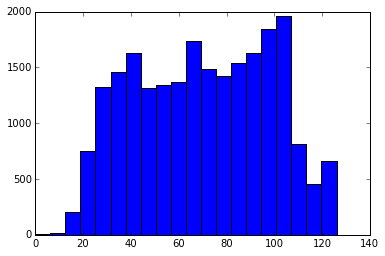

In [161]:
plt.hist(y_train, bins=20)

In [162]:
bins_extra = [np.percentile(y_train, 0),
        np.percentile(y_train, 25),
        np.percentile(y_train, 50),
        np.percentile(y_train, 75),
        np.percentile(y_train, 100) + 1]

In [163]:
bins_extra

[0.0, 46.0, 71.0, 94.0, 127.0]

In [164]:
y_train = np.digitize(y_train, bins_extra) - 1
y_val = np.digitize(y_val, bins_extra) - 1
y_test = np.digitize(y_test, bins_extra) - 1

(array([ 5612.,     0.,     0.,  5779.,     0.,     0.,  5556.,     0.,
            0.,  6025.]),
 array([ 0. ,  0.3,  0.6,  0.9,  1.2,  1.5,  1.8,  2.1,  2.4,  2.7,  3. ]),
 <a list of 10 Patch objects>)

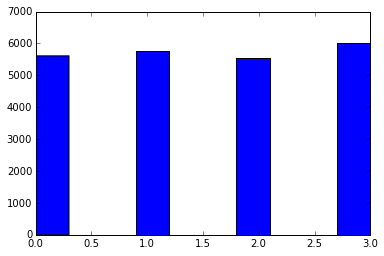

In [165]:
plt.hist(y_train)

In [ ]:
clf = LogisticRegression(C=0.01, penalty='l1')
clf.fit(f1_train, y_train).score(f1_val, y_val)

0.70199999999999996

In [ ]:
basic_wildfowl = Stacking(base_estimators=[
        (LogisticRegression(C=0.01, penalty='l1').fit,
         lambda clf, X: clf.predict(X)),
        (lambda X, y: LinearSVC(C=1, penalty='l2', loss='squared_hinge',
                                dual=True, multi_class='crammer_singer').fit(normalizer.transform(X), y),
         lambda clf, X: clf.predict(normalizer.transform(X))),
        (lambda X, y: LogisticRegression(C=8, penalty='l1').fit(normalizer.transform(X), y),
         lambda clf, X: clf.predict(normalizer.transform(X))),
        (lambda X, y: SVC(C=1, kernel='rbf', gamma=1).fit(normalizer.transform(X), y),
         lambda clf, X: clf.predict(normalizer.transform(X))),
        (lambda X, y: SVC(C=1, kernel='poly', gamma=1, degree=2).fit(normalizer.transform(X), y),
         lambda clf, X: clf.predict(normalizer.transform(X)))],
                    n_folds=5, extend_meta=False)
basic_wildfowl.fit(np.array(f1_train), y_train)

In [ ]:
basic_wildfowl.fit_meta(SVC(C=1, kernel='rbf', gamma=0.2).fit).score(np.array(f1_val), y_val)

In [ ]:
1

# Network deleted road, classes

In [37]:
with open('data_rem_road.pkl', 'rb') as f:
    X_train, Seg_train, y_train, X_val, Seg_val, y_val, X_test, Seg_test, y_test = pickle.load(f)
    
with open('features_rem_road.pkl', 'rb') as f:
    f1_train, f1_val, f1_test, f2_train, f2_val, f2_test = pickle.load(f)
    
bins = [np.percentile(y_train, 0),
        np.percentile(y_train, 25),
        np.percentile(y_train, 50),
        np.percentile(y_train, 75),
        np.percentile(y_train, 100) + 1]

y_train = np.digitize(y_train, bins) - 1
y_val = np.digitize(y_val, bins) - 1
y_test = np.digitize(y_test, bins) - 1

input_layer = InputLayer((None, f1_train[0].shape[0]))
ll1 = DenseLayer(input_layer, num_units=2048, nonlinearity=lasagne.nonlinearities.elu)
dr1 = DropoutLayer(ll1, p=0.5)
ll2 = DenseLayer(dr1, num_units=2048, nonlinearity=lasagne.nonlinearities.elu)
dr3 = DropoutLayer(ll2, p=0.5)
ll3 = DenseLayer(dr3, num_units=1024, nonlinearity=lasagne.nonlinearities.elu)
dr4 = DropoutLayer(ll3, p=0.5)
ll4 = DenseLayer(dr4, num_units=512, nonlinearity=lasagne.nonlinearities.elu)
dr5 = DropoutLayer(ll4, p=0.5)
ll5 = DenseLayer(dr5, num_units=256, nonlinearity=lasagne.nonlinearities.elu)
dr6 = DropoutLayer(ll5, p=0.5)
percentile = DenseLayer(dr6, num_units=len(set(y_train)), nonlinearity=softmax)

target_y = T.vector("target Y integer", dtype='int32')
input_X = T.matrix('X')

probs = lasagne.layers.get_output(percentile, input_X, deterministic = True)
y_predicted = np.argmax(probs, axis=1)

#all network weights (shared variables)
all_weights = lasagne.layers.get_all_params(percentile)
print(all_weights)

#Mean categorical crossentropy as a loss function - similar to logistic loss but for multiclass targets
loss = lasagne.objectives.categorical_crossentropy(probs, target_y).mean()
l2_penalty = regularize_layer_params(percentile, l2) * 1e-1
l1_penalty = regularize_layer_params(percentile, l1) * 1e-3
loss += l2_penalty + l1_penalty

#prediction accuracy
accuracy = lasagne.objectives.categorical_accuracy(probs, target_y).mean()

#This function computes gradient AND composes weight updates just like you did earlier
updates_sgd = lasagne.updates.adagrad(loss, all_weights, learning_rate=0.01)

#function that computes loss and updates weights
train_fun = theano.function([input_X, target_y], [loss, accuracy], updates = updates_sgd)

#function that just computes accuracy
accuracy_fun = theano.function([input_X, target_y],accuracy)

num_epochs = 30 #amount of passes through the data

batch_size = 100 #number of samples processed at each function call

for epoch in range(num_epochs):
    # In each epoch, we do a full pass over the training data:
    train_err = 0
    train_acc = 0
    train_batches = 0
    start_time = time.time()
    for batch in iterate_minibatches(f1_train, y_train, batch_size):
        inputs, targets = batch
        train_err_batch, train_acc_batch = train_fun(inputs, targets.astype(np.int32))
        train_err += train_err_batch
        train_acc += train_acc_batch
        train_batches += 1

    # And a full pass over the validation data:
    val_acc = 0
    val_batches = 0
    for batch in iterate_minibatches(f1_val, y_val, batch_size):
        inputs, targets = batch
        val_acc += accuracy_fun(inputs, targets.astype(np.int32))
        val_batches += 1

    
    # Then we print the results for this epoch:
    print("Epoch {} of {} took {:.3f}s".format(
        epoch + 1, num_epochs, time.time() - start_time))

    print("  training loss (in-iteration):\t\t{:.6f}".format(train_err / train_batches))
    print("  train accuracy:\t\t{:.2f} %".format(
        train_acc / train_batches * 100))
    print("  validation accuracy:\t\t{:.2f} %".format(
        val_acc / val_batches * 100))

[W, b, W, b, W, b, W, b, W, b, W, b]
Epoch 1 of 30 took 1.998s
  training loss (in-iteration):		3749.619600
  train accuracy:		28.59 %
  validation accuracy:		26.00 %
Epoch 2 of 30 took 2.015s
  training loss (in-iteration):		3.113019
  train accuracy:		32.24 %
  validation accuracy:		46.60 %
Epoch 3 of 30 took 1.982s
  training loss (in-iteration):		2.176733
  train accuracy:		45.90 %
  validation accuracy:		49.40 %
Epoch 4 of 30 took 2.010s
  training loss (in-iteration):		1.896570
  train accuracy:		52.72 %
  validation accuracy:		58.00 %
Epoch 5 of 30 took 1.978s
  training loss (in-iteration):		1.765641
  train accuracy:		58.38 %
  validation accuracy:		52.20 %
Epoch 6 of 30 took 2.000s
  training loss (in-iteration):		1.671071
  train accuracy:		63.17 %
  validation accuracy:		62.00 %
Epoch 7 of 30 took 2.000s
  training loss (in-iteration):		1.551463
  train accuracy:		69.31 %
  validation accuracy:		55.20 %
Epoch 8 of 30 took 2.111s
  training loss (in-iteration):		1.477413
  t

KeyboardInterrupt: 

# Network with road, 5 classes

In [ ]:
with open('data_basic.pkl', 'rb') as f:
    X_train, Seg_train, y_train, X_val, Seg_val, y_val, X_test, Seg_test, y_test = pickle.load(f)
    
with open('features_basic.pkl', 'rb') as f:
    f1_train, f1_val, f1_test, f2_train, f2_val, f2_test = pickle.load(f)
    
bins = [np.percentile(y_train, 0),
        np.percentile(y_train, 25),
        np.percentile(y_train, 50),
        np.percentile(y_train, 75),
        np.percentile(y_train, 100) + 1]

y_train = np.digitize(y_train, bins) - 1
y_val = np.digitize(y_val, bins) - 1
y_test = np.digitize(y_test, bins) - 1

In [36]:
input_layer = InputLayer((None, f1_train[0].shape[0]))
ll1 = DenseLayer(input_layer, num_units=2048, nonlinearity=lasagne.nonlinearities.elu)
dr1 = DropoutLayer(ll1, p=0.5)
ll2 = DenseLayer(dr1, num_units=2048, nonlinearity=lasagne.nonlinearities.elu)
dr3 = DropoutLayer(ll2, p=0.5)
ll3 = DenseLayer(dr3, num_units=1024, nonlinearity=lasagne.nonlinearities.elu)
dr4 = DropoutLayer(ll3, p=0.5)
ll4 = DenseLayer(dr4, num_units=512, nonlinearity=lasagne.nonlinearities.elu)
dr5 = DropoutLayer(ll4, p=0.5)
ll5 = DenseLayer(dr5, num_units=256, nonlinearity=lasagne.nonlinearities.elu)
dr6 = DropoutLayer(ll5, p=0.5)
percentile = DenseLayer(dr6, num_units=len(set(y_train)), nonlinearity=softmax)

target_y = T.vector("target Y integer", dtype='int32')
input_X = T.matrix('X')

probs = lasagne.layers.get_output(percentile, input_X, deterministic = True)
y_predicted = np.argmax(probs, axis=1)

#all network weights (shared variables)
all_weights = lasagne.layers.get_all_params(percentile)
print(all_weights)

#Mean categorical crossentropy as a loss function - similar to logistic loss but for multiclass targets
loss = lasagne.objectives.categorical_crossentropy(probs, target_y).mean()
l2_penalty = regularize_layer_params(percentile, l2) * 1e-1
l1_penalty = regularize_layer_params(percentile, l1) * 1e-2
loss += l2_penalty + l1_penalty

#prediction accuracy
accuracy = lasagne.objectives.categorical_accuracy(probs, target_y).mean()

#This function computes gradient AND composes weight updates just like you did earlier
updates_sgd = lasagne.updates.adagrad(loss, all_weights, learning_rate=0.005)

#function that computes loss and updates weights
train_fun = theano.function([input_X, target_y], [loss, accuracy], updates = updates_sgd)

#function that just computes accuracy
accuracy_fun = theano.function([input_X, target_y],accuracy)

num_epochs = 300 #amount of passes through the data

batch_size = 100 #number of samples processed at each function call

for epoch in range(num_epochs):
    # In each epoch, we do a full pass over the training data:
    train_err = 0
    train_acc = 0
    train_batches = 0
    start_time = time.time()
    for batch in iterate_minibatches(f1_train, y_train, batch_size):
        inputs, targets = batch
        train_err_batch, train_acc_batch = train_fun(inputs, targets.astype(np.int32))
        train_err += train_err_batch
        train_acc += train_acc_batch
        train_batches += 1

    # And a full pass over the validation data:
    val_acc = 0
    val_batches = 0
    for batch in iterate_minibatches(f1_val, y_val, batch_size):
        inputs, targets = batch
        val_acc += accuracy_fun(inputs, targets.astype(np.int32))
        val_batches += 1

    
    # Then we print the results for this epoch:
    print("Epoch {} of {} took {:.3f}s".format(
        epoch + 1, num_epochs, time.time() - start_time))

    print("  training loss (in-iteration):\t\t{:.6f}".format(train_err / train_batches))
    print("  train accuracy:\t\t{:.2f} %".format(
        train_acc / train_batches * 100))
    print("  validation accuracy:\t\t{:.2f} %".format(
        val_acc / val_batches * 100))

[W, b, W, b, W, b, W, b, W, b, W, b]
Epoch 1 of 300 took 2.036s
  training loss (in-iteration):		140.387504
  train accuracy:		31.28 %
  validation accuracy:		52.80 %
Epoch 2 of 300 took 2.016s
  training loss (in-iteration):		13.295092
  train accuracy:		55.17 %
  validation accuracy:		58.20 %
Epoch 3 of 300 took 2.002s
  training loss (in-iteration):		12.705572
  train accuracy:		62.45 %
  validation accuracy:		60.40 %
Epoch 4 of 300 took 2.003s
  training loss (in-iteration):		12.226186
  train accuracy:		68.86 %
  validation accuracy:		60.40 %
Epoch 5 of 300 took 2.002s
  training loss (in-iteration):		11.880651
  train accuracy:		71.07 %
  validation accuracy:		60.20 %
Epoch 6 of 300 took 2.014s
  training loss (in-iteration):		11.404465
  train accuracy:		79.07 %
  validation accuracy:		61.80 %
Epoch 7 of 300 took 2.018s
  training loss (in-iteration):		11.053822
  train accuracy:		84.86 %
  validation accuracy:		65.00 %
Epoch 8 of 300 took 1.896s
  training loss (in-iteration):	

KeyboardInterrupt: 

# Network deleted road, 5 classes, stacked with segs

In [9]:
with open('data_rem_road.pkl', 'rb') as f:
    X_train, Seg_train, y_train, X_val, Seg_val, y_val, X_test, Seg_test, y_test = pickle.load(f)
    
with open('features_rem_road.pkl', 'rb') as f:
    f1_train, f1_val, f1_test, f2_train, f2_val, f2_test = pickle.load(f)
    
f1_train = np.hstack((np.array(f1_train), np.array(f2_train)))
f1_val = np.hstack((np.array(f1_val), np.array(f2_val)))
    
bins = [np.percentile(y_train, 0),
        np.percentile(y_train, 25),
        np.percentile(y_train, 50),
        np.percentile(y_train, 75),
        np.percentile(y_train, 100) + 1]

y_train = np.digitize(y_train, bins) - 1
y_val = np.digitize(y_val, bins) - 1
y_test = np.digitize(y_test, bins) - 1

input_layer = InputLayer((None, f1_train[0].shape[0]))
ll1 = DenseLayer(input_layer, num_units=4096)
dr1 = DropoutLayer(ll1, p=0.5)
ll2 = DenseLayer(dr1, num_units=4096)
dr3 = DropoutLayer(ll2, p=0.5)
percentile = DenseLayer(dr3, num_units=len(set(y_train)), nonlinearity=softmax)

target_y = T.vector("target Y integer", dtype='int32')
input_X = T.matrix('X')

probs = lasagne.layers.get_output(percentile, input_X, deterministic = True)
y_predicted = np.argmax(probs, axis=1)

#all network weights (shared variables)
all_weights = lasagne.layers.get_all_params(percentile)
print(all_weights)

#Mean categorical crossentropy as a loss function - similar to logistic loss but for multiclass targets
loss = lasagne.objectives.categorical_crossentropy(probs, target_y).mean()
l2_penalty = regularize_layer_params(percentile, l2) * 1e-2
l1_penalty = regularize_layer_params(percentile, l1) * 1e-3
loss += l2_penalty + l1_penalty

#prediction accuracy
accuracy = lasagne.objectives.categorical_accuracy(probs, target_y).mean()

#This function computes gradient AND composes weight updates just like you did earlier
updates_sgd = lasagne.updates.adagrad(loss, all_weights, learning_rate=0.01)

#function that computes loss and updates weights
train_fun = theano.function([input_X, target_y], [loss, accuracy], updates = updates_sgd)

#function that just computes accuracy
accuracy_fun = theano.function([input_X, target_y],accuracy)

num_epochs = 30 #amount of passes through the data

batch_size = 100 #number of samples processed at each function call

for epoch in range(num_epochs):
    # In each epoch, we do a full pass over the training data:
    train_err = 0
    train_acc = 0
    train_batches = 0
    start_time = time.time()
    for batch in iterate_minibatches(f1_train, y_train, batch_size):
        inputs, targets = batch
        train_err_batch, train_acc_batch = train_fun(inputs, targets.astype(np.int32))
        train_err += train_err_batch
        train_acc += train_acc_batch
        train_batches += 1

    # And a full pass over the validation data:
    val_acc = 0
    val_batches = 0
    for batch in iterate_minibatches(f1_val, y_val, batch_size):
        inputs, targets = batch
        val_acc += accuracy_fun(inputs, targets.astype(np.int32))
        val_batches += 1

    
    # Then we print the results for this epoch:
    print("Epoch {} of {} took {:.3f}s".format(
        epoch + 1, num_epochs, time.time() - start_time))

    print("  training loss (in-iteration):\t\t{:.6f}".format(train_err / train_batches))
    print("  train accuracy:\t\t{:.2f} %".format(
        train_acc / train_batches * 100))
    print("  validation accuracy:\t\t{:.2f} %".format(
        val_acc / val_batches * 100))

[W, b, W, b, W, b]


MemoryError: Error allocating 603979776 bytes of device memory (out of memory).
Apply node that caused the error: GpuDot22(GpuDimShuffle{1,0}.0, GpuElemwise{Composite{(i0 + (i0 * sgn(i1)))}}[(0, 0)].0)
Toposort index: 54
Inputs types: [CudaNdarrayType(float32, matrix), CudaNdarrayType(float32, matrix)]
Inputs shapes: [(36864, 100), (100, 4096)]
Inputs strides: [(1, 36864), (4096, 1)]
Inputs values: ['not shown', 'not shown']
Outputs clients: [[GpuElemwise{Sqr}[(0, 0)](GpuDot22.0)]]

HINT: Re-running with most Theano optimization disabled could give you a back-trace of when this node was created. This can be done with by setting the Theano flag 'optimizer=fast_compile'. If that does not work, Theano optimizations can be disabled with 'optimizer=None'.
HINT: Use the Theano flag 'exception_verbosity=high' for a debugprint and storage map footprint of this apply node.

# Network with road, 5 classes, stacked with segs

In [8]:
with open('data_basic.pkl', 'rb') as f:
    X_train, Seg_train, y_train, X_val, Seg_val, y_val, X_test, Seg_test, y_test = pickle.load(f)
    
with open('features_basic.pkl', 'rb') as f:
    f1_train, f1_val, f1_test, f2_train, f2_val, f2_test = pickle.load(f)
    
f1_train = np.hstack((np.array(f1_train), np.array(f2_train)))
f1_val = np.hstack((np.array(f1_val), np.array(f2_val)))
    
bins = [np.percentile(y_train, 0),
        np.percentile(y_train, 25),
        np.percentile(y_train, 50),
        np.percentile(y_train, 75),
        np.percentile(y_train, 100) + 1]

y_train = np.digitize(y_train, bins) - 1
y_val = np.digitize(y_val, bins) - 1
y_test = np.digitize(y_test, bins) - 1

input_layer = InputLayer((None, f1_train[0].shape[0]))
ll1 = DenseLayer(input_layer, num_units=4096)
dr1 = DropoutLayer(ll1, p=0.5)
ll2 = DenseLayer(dr1, num_units=4096)
dr3 = DropoutLayer(ll2, p=0.5)
percentile = DenseLayer(dr3, num_units=len(set(y_train)), nonlinearity=softmax)

target_y = T.vector("target Y integer", dtype='int32')
input_X = T.matrix('X')

probs = lasagne.layers.get_output(percentile, input_X, deterministic = True)
y_predicted = np.argmax(probs, axis=1)

#all network weights (shared variables)
all_weights = lasagne.layers.get_all_params(percentile)
print(all_weights)

#Mean categorical crossentropy as a loss function - similar to logistic loss but for multiclass targets
loss = lasagne.objectives.categorical_crossentropy(probs, target_y).mean()
l2_penalty = regularize_layer_params(percentile, l2) * 1e-1
l1_penalty = regularize_layer_params(percentile, l1) * 1e-2
loss += l2_penalty + l1_penalty

#prediction accuracy
accuracy = lasagne.objectives.categorical_accuracy(probs, target_y).mean()

#This function computes gradient AND composes weight updates just like you did earlier
updates_sgd = lasagne.updates.adagrad(loss, all_weights, learning_rate=0.01)

#function that computes loss and updates weights
train_fun = theano.function([input_X, target_y], [loss, accuracy], updates = updates_sgd)

#function that just computes accuracy
accuracy_fun = theano.function([input_X, target_y],accuracy)

num_epochs = 30 #amount of passes through the data

batch_size = 100 #number of samples processed at each function call

for epoch in range(num_epochs):
    # In each epoch, we do a full pass over the training data:
    train_err = 0
    train_acc = 0
    train_batches = 0
    start_time = time.time()
    for batch in iterate_minibatches(f1_train, y_train, batch_size):
        inputs, targets = batch
        train_err_batch, train_acc_batch = train_fun(inputs, targets.astype(np.int32))
        train_err += train_err_batch
        train_acc += train_acc_batch
        train_batches += 1

    # And a full pass over the validation data:
    val_acc = 0
    val_batches = 0
    for batch in iterate_minibatches(f1_val, y_val, batch_size):
        inputs, targets = batch
        val_acc += accuracy_fun(inputs, targets.astype(np.int32))
        val_batches += 1

    
    # Then we print the results for this epoch:
    print("Epoch {} of {} took {:.3f}s".format(
        epoch + 1, num_epochs, time.time() - start_time))

    print("  training loss (in-iteration):\t\t{:.6f}".format(train_err / train_batches))
    print("  train accuracy:\t\t{:.2f} %".format(
        train_acc / train_batches * 100))
    print("  validation accuracy:\t\t{:.2f} %".format(
        val_acc / val_batches * 100))

[W, b, W, b, W, b]
Epoch 1 of 30 took 4.315s
  training loss (in-iteration):		4726.092065
  train accuracy:		24.38 %
  validation accuracy:		33.00 %
Epoch 2 of 30 took 4.367s
  training loss (in-iteration):		11.885494
  train accuracy:		30.03 %
  validation accuracy:		26.00 %
Epoch 3 of 30 took 4.157s
  training loss (in-iteration):		5.118199
  train accuracy:		30.03 %
  validation accuracy:		25.20 %
Epoch 4 of 30 took 4.156s
  training loss (in-iteration):		4.719048
  train accuracy:		33.24 %
  validation accuracy:		25.00 %
Epoch 5 of 30 took 4.154s
  training loss (in-iteration):		4.602650
  train accuracy:		33.83 %
  validation accuracy:		25.40 %
Epoch 6 of 30 took 4.158s
  training loss (in-iteration):		4.511264
  train accuracy:		34.45 %
  validation accuracy:		29.20 %
Epoch 7 of 30 took 4.156s
  training loss (in-iteration):		4.433514
  train accuracy:		35.31 %
  validation accuracy:		31.80 %
Epoch 8 of 30 took 4.153s
  training loss (in-iteration):		4.364174
  train accuracy:		3